# 6A grayscale image binarization

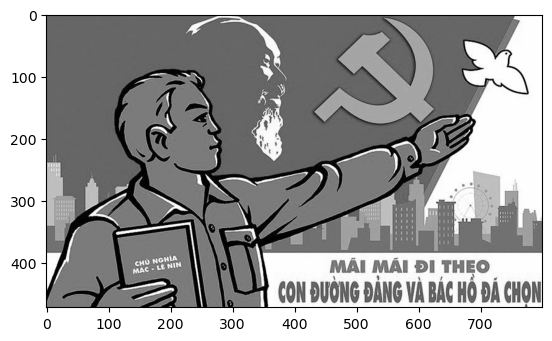

uint8


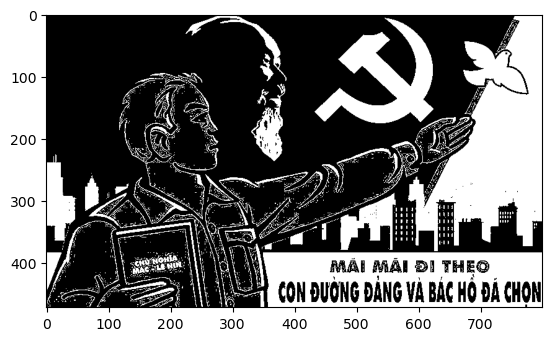

In [10]:
import numba
from numba import cuda
import numpy as np
import matplotlib.pyplot as plt
import time

hostInp=plt.imread("../images/image1_gray.jpg")
plt.imshow(hostInp)
plt.show()
print(hostInp.dtype)
(H,W,C) = hostInp.shape

t1 = time.time()
pixelcount= H*W
hostInp=hostInp.reshape((pixelcount,3))

devOut = cuda.device_array((pixelcount, C), np.uint8)



hostOut=np.zeros((H,W,C),np.uint8)

devInp=cuda.to_device(hostInp)
threshold = 128

@cuda.jit
def grayscale_threshold(src, dst, t):
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    if tidx < src.shape[0]: 
        g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
        bin = 255 if g >= t else 0
        dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = bin

blockSize = 64
gridSize = (pixelcount + blockSize - 1) // blockSize
grayscale_threshold[gridSize, blockSize](devInp, devOut, threshold)
hostOut = devOut.copy_to_host().reshape(H, W, C)

t2 = time.time()
#plt.imshow(hostOut)
plt.imshow(hostOut, cmap='gray')
plt.show()



# 6b: Brightness control

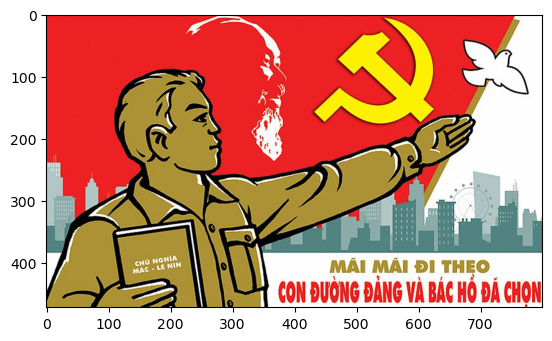

uint8


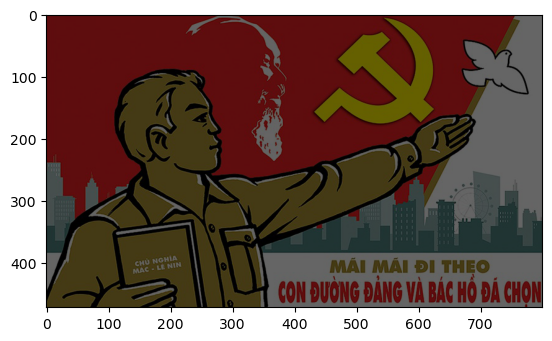

In [14]:
import numba
from numba import cuda
import numpy as np
import matplotlib.pyplot as plt
import time

hostInp=plt.imread("../images/image1.jpg")
plt.imshow(hostInp)
plt.show()
print(hostInp.dtype)
(H,W,C) = hostInp.shape

t1 = time.time()
pixelcount= H*W
hostInp=hostInp.reshape((pixelcount,3))

devOut = cuda.device_array((pixelcount, C), np.uint8)



hostOut=np.zeros((H,W,C),np.uint8)

devInp=cuda.to_device(hostInp)
threshold = -0.6

@cuda.jit
def grayscale_threshold(src, dst, t):
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    if tidx < src.shape[0]: 
        dst[tidx, 0] = src[tidx,0] + t*src[tidx,0]
        dst[tidx, 1] = src[tidx,1] + t*src[tidx,1]
        dst[tidx, 2] = src[tidx,2] + t*src[tidx,2]

blockSize = 64
gridSize = (pixelcount + blockSize - 1) // blockSize
grayscale_threshold[gridSize, blockSize](devInp, devOut, threshold)
hostOut = devOut.copy_to_host().reshape(H, W, C)

t2 = time.time()
#plt.imshow(hostOut)
plt.imshow(hostOut)
plt.show()



# 6c: Blending images


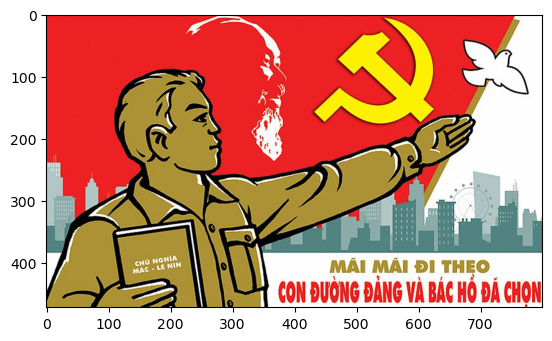

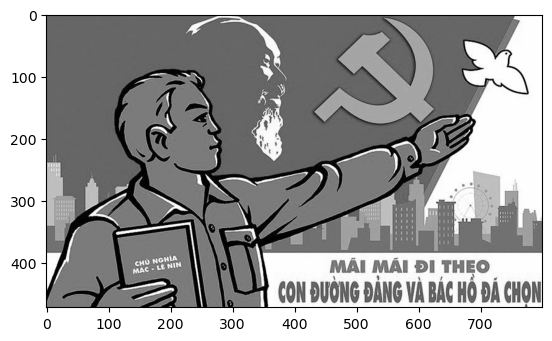

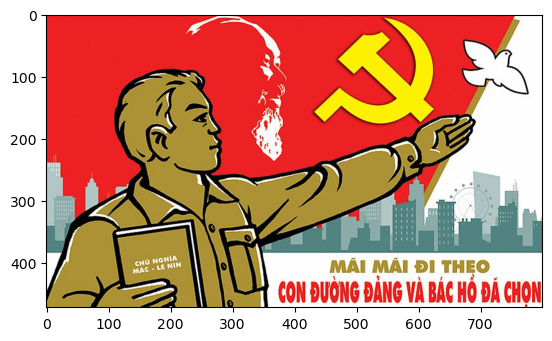

In [17]:
import numba
from numba import cuda
import numpy as np
import matplotlib.pyplot as plt
import time

hostInp=plt.imread("../images/image1.jpg")
plt.imshow(hostInp)
plt.show()


hostInp2=plt.imread("../images/image1_gray.jpg")
plt.imshow(hostInp2)
plt.show()

(H,W,C) = hostInp.shape

t1 = time.time()
pixelcount= H*W

hostInp=hostInp.reshape((pixelcount,3))
hostInp2=hostInp2.reshape((pixelcount,3))


devOut = cuda.device_array((pixelcount, C), np.uint8)



hostOut=np.zeros((H,W,C),np.uint8)

devInp=cuda.to_device(hostInp)
devInp2=cuda.to_device(hostInp2)
threshold = 0.1

@cuda.jit
def grayscale_threshold(src, src2, dst, t):
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    if tidx < src.shape[0]: 
        for i in range(3):
            dst[tidx,i]= t * src[tidx,i] + (1-t) * src[tidx,i] 

blockSize = 64
gridSize = (pixelcount + blockSize - 1) // blockSize
grayscale_threshold[gridSize, blockSize](devInp ,devInp2 , devOut, threshold)
hostOut = devOut.copy_to_host().reshape(H, W, C)

t2 = time.time()
#plt.imshow(hostOut)
plt.imshow(hostOut)
plt.show()

